<a href="https://colab.research.google.com/github/MrZhengXin/CSP201809-5/blob/master/water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pytorch-transformers
!sudo apt-get install libmysqlclient-dev
!pip install pattern

  Using cached https://files.pythonhosted.org/packages/1e/07/b0e61b6c818ed4b6145fe01d1c341223aa6cfbc3928538ad1f2b890924a3/Pattern-3.6.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/8e/26/a6bd68f13e0f38fbb643d6e497fc3462be83a0b6c4d43425c78bb51a7291/backports.csv-1.0.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4d/38/c5f8bac9c50f3042c8f05615f84206f77f03db79781db841898fde1bb284/mysqlclient-1.4.4.tar.gz
     |████████████████████████████████| 194kB 6.3MB/s 
     |████████████████████████████████| 5.6MB 41.3MB/s 
     |████████████████████████████████| 5.5MB 36.5MB/s 
     |████████████████████████████████| 419kB 41.7MB/s 
     |████████████████████████████████| 9.7MB 33.8MB/s 
     |████████████████████████████████| 81kB 20.0MB/s 
  Created wheel for pattern: filename=Pattern-3.6-cp36-none-any.whl size=22332724 sha256=2b0a8a3671276ca430ef66bb87543ca8d56189663a3baaed6c79ca47e6e5c225
  Stored in directory: /root/.cache/pip/wheels/dc/9a/0e/5fb

In [30]:
from pattern.web import Twitter, plaintext
from pattern.db  import Datasheet
from pattern.en  import sentiment as sentiment_en
import numpy as np
    
csv = Datasheet()
cities = ['Beijing culture', 'Shanghai culture', 'Tokyo culture', 'Paris culture', 'London culture', 'New York culture', 'San Fransisco culture']
cities_mean = dict()
cities_var = dict()
for i in cities:
  plrs = []
  for tweet in Twitter().search(i, count=1000):
      if tweet.language in ("en"):
          s = plaintext(tweet.description) 
          w = sentiment_en(s) 
          polarity, subjectivity = w
          plrs.append(polarity)
          csv.append([i, tweet.date, s, w])
  plrs = np.array(plrs)
  cities_mean[i] = plrs.mean()
  cities_var[i] = plrs.var()
print(cities_mean)
print(cities_var)

{'Beijing culture': 0.11889616402116401, 'Shanghai culture': 0.0628567266067266, 'Tokyo culture': 0.25838744588744594, 'Paris culture': 0.21822916666666664, 'London culture': 0.10873692786614134, 'New York culture': 0.12834750418802146, 'San Fransisco culture': 0.1863425925925926}
{'Beijing culture': 0.08629238956251226, 'Shanghai culture': 0.048402446217866074, 'Tokyo culture': 0.038907954194074314, 'Paris culture': 0.05284261067708333, 'London culture': 0.07754636276457226, 'New York culture': 0.03515534921456806, 'San Fransisco culture': 0.00011456189986282547}


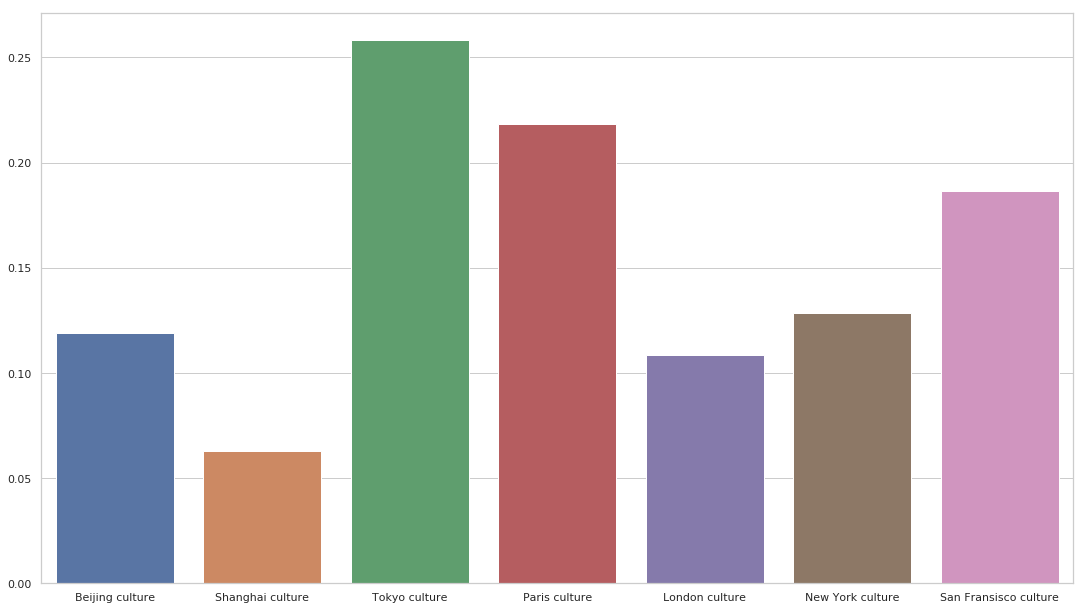

In [46]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

lists = sorted(cities_mean.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuple
df = pd.DataFrame(cities_mean, index=[0])
sns.set(style="whitegrid")
sns.barplot(data=df, capsize=.05)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [22]:
import numpy as np
plrs = np.array(plrs)
print(plrs.mean())
print(plrs.var())

0.11889616402116401
0.08629238956251226
